# Reinvent the Wheel Hackathon
## Team: Green Dream
1. Alexandra Malone
2. Megan A
3. Mike Remezo
5. Shreedhar
6. Steve

Required libraries:
numpy, scipy, statsmodels, pandas, matplotlib, seaborn, scikit-learn, fbprophet, tensorflow, torch, 

# Visualizations

In [2]:
# import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from glob import glob

from ipywidgets import interact, widgets

In [3]:
# Some display settings

pd.set_option("display.max_columns", 500)

plt.style.use("seaborn-colorblind")

pal = sns.color_palette()

In [4]:
# Define constants of the program

STR_LINE = ''.join(['-']*108)

class Constants:
    
    def __init__(self):
        self.dir_root = "../../data/public"
        self.dir_images = "../../data/images"
        self.path_csv = os.path.join(self.dir_root, "Challenge1_train_data.csv")
        

consts = Constants()

In [5]:

df_data = pd.read_csv(consts.path_csv, low_memory=False)

In [6]:
list_columns = list(df_data.columns)
print(f"list_columns: {list_columns}")

display(df_data.head())

list_columns: ['date', 'dc_name', 'size_code', 'retail_price', 'total_tires', 'zip_code']


,date,dc_name,size_code,retail_price,total_tires,zip_code
0,2022-02-05,OAKLAND,1856015,70.090,1,94604
1,2021-03-02,OAKLAND,1856015,59.090,1,94604
2,2020-12-08,OAKLAND,1856015,53.545,1,94604
3,2022-01-17,OAKLAND,1856015,58.410,1,94604
4,2020-11-13,OAKLAND,1856015,43.085,1,94604


In [7]:

list_select = ['date', 'dc_name', 'size_code', 'retail_price', 'total_tires', 'zip_code']

df_data = df_data[list_select]

display(df_data.head())

,date,dc_name,size_code,retail_price,total_tires,zip_code
0,2022-02-05,OAKLAND,1856015,70.090,1,94604
1,2021-03-02,OAKLAND,1856015,59.090,1,94604
2,2020-12-08,OAKLAND,1856015,53.545,1,94604
3,2022-01-17,OAKLAND,1856015,58.410,1,94604
4,2020-11-13,OAKLAND,1856015,43.085,1,94604


In [8]:
df_data.shape

(284700, 6)

In [10]:
# Print count and unique values of columns

def get_uniq_val_dict(ser_x):
    dict_uniq_vals = dict(ser_x.value_counts())
    return dict_uniq_vals
    

def print_count_uniq_vals(df_x, list_cols):
    for col in list_cols:
        dict_uniq_vals = get_uniq_val_dict(df_x[col])
        print(f"{STR_LINE}\ncolumn: {col} ({len(dict_uniq_vals)})")
        if len(dict_uniq_vals) < 31:
            print(f"\n{dict_uniq_vals}")
        
print_count_uniq_vals(df_data, list_select)

------------------------------------------------------------------------------------------------------------
column: date (730)
------------------------------------------------------------------------------------------------------------
column: dc_name (4)

{'SACRAMENTO': 113150, 'BAKERSFIELD': 76650, 'OAKLAND': 59860, 'SAN JOSE': 35040}
------------------------------------------------------------------------------------------------------------
column: size_code (157)
------------------------------------------------------------------------------------------------------------
column: retail_price (52401)
------------------------------------------------------------------------------------------------------------
column: total_tires (424)
------------------------------------------------------------------------------------------------------------
column: zip_code (4)

{95838: 113150, 93308: 76650, 94604: 59860, 95131: 35040}


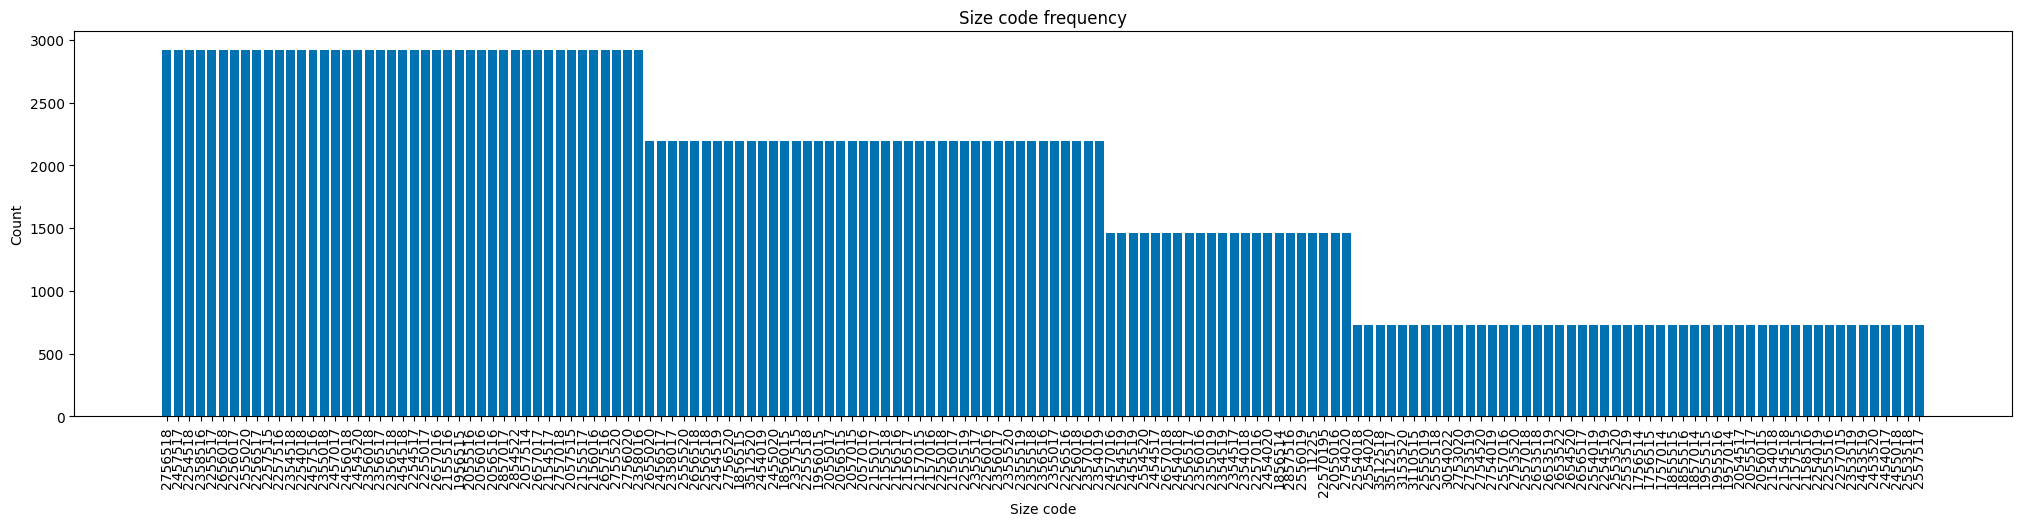

In [11]:
# plot bar plots from dictionary 
def plot_bar_graph(dict_x, title='dictionary x', xlabel='X', ylabel='Y'):
#     lists = sorted(dict_x.items())
    fig, axes = plt.subplots(1, 1, figsize=(25, 5))
    axes.bar(range(len(dict_x)), 
           list(dict_x.values()),
           align='center')
    plt.xticks(range(len(dict_x)), 
           list(dict_x.keys()), rotation=90)
    
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
    
dict_op_airline = get_uniq_val_dict(df_data['size_code'])
plot_bar_graph(dict_op_airline, 
                title='Size code frequency',
                xlabel='Size code',
                ylabel='Count'
               )

In [37]:
# Plot time-series

dir_images_out = os.path.join(consts.dir_root, 'images')
if not os.path.exists(dir_images_out):
    os.makedirs(dir_images_out)
    
def plot_time_series(df_x, col_time, col_val, agg='sum'):
    df_temp = df_x.copy()
    df_temp[col_time] = pd.to_datetime(df_temp[col_time], infer_datetime_format=True) # format='', errors='ignore'
    df_temp = df_temp.set_index(col_time)
    
    display(df_temp.head())
    
    for group_name, df_y in df_temp.groupby(['dc_name_size_code']):
        fig, axes = plt.subplots(1, 1, figsize=(10, 5))
        df_y[col_val].plot(legend='True', ax=axes)
        out_path = os.path.join(dir_images_out, f'{group_name}.png')
        plt.savefig(out_path, dpi=200)
        plt.close()
        

In [38]:
plot_time_series(df_time_agg.head(1000), 'date', 'total_tires')df_data['forecast_timestamp']

,dc_name,size_code,total_tires,dc_name_size_code
date,,,,
2020-09-20,BAKERSFIELD,1856015,0,BAKERSFIELD_1856015
2020-09-20,BAKERSFIELD,1856514,0,BAKERSFIELD_1856514
2020-09-20,BAKERSFIELD,1856515,0,BAKERSFIELD_1856515
2020-09-20,BAKERSFIELD,1956015,0,BAKERSFIELD_1956015
2020-09-20,BAKERSFIELD,1956515,0,BAKERSFIELD_1956515


# Create time series data

In [14]:
list_gp_cols = ['date', 'dc_name', 'size_code']
df_time_agg = df_data.groupby(list_gp_cols)['total_tires'].agg('sum').reset_index()

def get_dc_name_size_concat(row):
    return f"{row['dc_name']}_{row['size_code']}"

df_time_agg['dc_name_size_code'] = df_time_agg.apply(lambda row: get_dc_name_size_concat(row), axis=1)
display(df_time_agg.head())


,date,dc_name,size_code,total_tires,dc_name_size_code
0,2020-09-20,BAKERSFIELD,1856015,0,BAKERSFIELD_1856015
1,2020-09-20,BAKERSFIELD,1856514,0,BAKERSFIELD_1856514
2,2020-09-20,BAKERSFIELD,1856515,0,BAKERSFIELD_1856515
3,2020-09-20,BAKERSFIELD,1956015,0,BAKERSFIELD_1956015
4,2020-09-20,BAKERSFIELD,1956515,0,BAKERSFIELD_1956515


,dc_name,size_code,total_tires,dc_name_size_code
date,,,,
2020-09-20,BAKERSFIELD,1856015,0,BAKERSFIELD_1856015
2020-09-20,BAKERSFIELD,1856514,0,BAKERSFIELD_1856514
2020-09-20,BAKERSFIELD,1856515,0,BAKERSFIELD_1856515
2020-09-20,BAKERSFIELD,1956015,0,BAKERSFIELD_1956015
2020-09-20,BAKERSFIELD,1956515,0,BAKERSFIELD_1956515


2 ('BAKERSFIELD_1856015', date
2020-09-20     0
2020-09-21    18
2020-09-22     7
2020-09-23     3
2020-09-24    15
              ..
2022-09-15     5
2022-09-16     3
2022-09-17     3
2022-09-18     0
2022-09-19     9
Name: total_tires, Length: 730, dtype: int64)


In [27]:
def create_time_series(df_x, col_time, col_val, agg='sum'):
    df_temp = df_x.copy()
    dir_out = os.path.join(consts.dir_root, 'sep_time_series')
    if not os.path.exists(dir_out):
        os.makedirs(dir_out)
    
    for group_name, df_y in df_temp.groupby(['dc_name_size_code']):
        
        list_cols = ['dc_name_size_code', 'date','total_tires']
        out_path = os.path.join(dir_out, f"ts_{group_name}.csv")
        df_y = df_y[list_cols].reset_index(drop=True)
        
        df_y['Weekly'] = df_y['total_tires'].rolling(7, min_periods=0).sum()
        df_y['Biweekly'] = df_y['total_tires'].rolling(14, min_periods=0).sum()
        df_y['Monthly'] = df_y['total_tires'].rolling(30, min_periods=0).sum()
        
        df_y.to_csv(out_path, index=False)
    
    
    
create_time_series(df_time_agg, 'date', 'total_tires')

,date,zip_code,size_code,total_tires
0,2020-09-20,93308,1856015,0
1,2020-09-20,93308,1856514,0
2,2020-09-20,93308,1856515,0
3,2020-09-20,93308,1956015,0
4,2020-09-20,93308,1956515,0


,zip_code,size_code,total_tires
date,,,
2020-09-20,93308,1856015,0
2020-09-20,93308,1856514,0
2020-09-20,93308,1856515,0
2020-09-20,93308,1956015,0
2020-09-20,93308,1956515,0


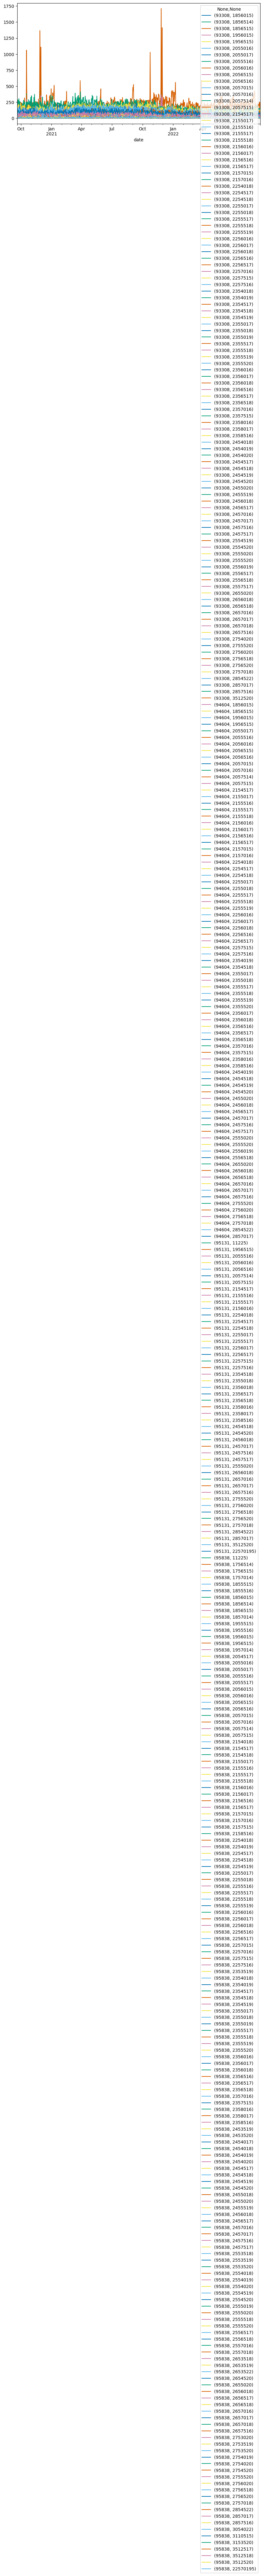

In [15]:
list_gp_cols = ['date', 'zip_code', 'size_code']
df_time_agg = df_data.groupby(list_gp_cols)['total_tires'].agg('sum').reset_index()
display(df_time_agg.head())


plot_time_series(df_time_agg, 'date', 'total_tires')

In [52]:
list_zip = list(df_time_agg['zip_code'].unique())
lxw = [widgets.Checkbox(value=True, description=airline, disabled=False) for airline in list_airlines]
print(dict_args)

@interact
def plot_i_time_series(lx=lxw):
    zip_code = [zip_code for zip_code in list_zip]
    cond_airlines = df_time_agg['zip_code'].isin(zip_code)
    df_temp = df_time_agg[cond_airlines]
    plot_time_series(df_temp, 'FlightDate', 'DepDelayMinutes')

{'9E': True, 'AA': True, 'AS': True, 'B6': True, 'C5': True, 'DL': True, 'F9': True, 'G4': True, 'G7': True, 'HA': True, 'MQ': True, 'NK': True, 'OH': True, 'OO': True, 'PT': True, 'QX': True, 'UA': True, 'WN': True, 'YV': True, 'YX': True, 'ZW': True}


interactive(children=(Dropdown(description='lx', options=(Checkbox(value=True, description='9E'), Checkbox(val…

In [54]:
airline = 'AA'
cond_airline = df_time_agg['Operating_Airline '] == airline
df_ts = df_time_agg[cond_airline].reset_index()

df_ts.head()

,index,FlightDate,Operating_Airline,DepDelayMinutes
0,1,2022-02-01,AA,10610.0
1,22,2022-02-02,AA,30819.0
2,43,2022-02-03,AA,43330.0
3,64,2022-02-04,AA,56240.0
4,85,2022-02-05,AA,45129.0


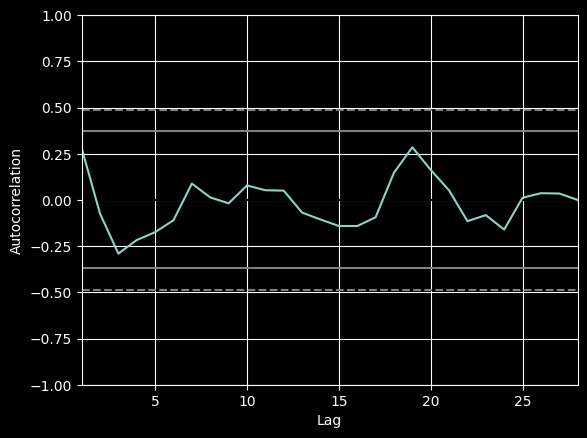

In [56]:
from pandas.plotting import autocorrelation_plot
plt.style.use('dark_background')
autocorrelation_plot(df_ts['DepDelayMinutes'])
plt.show()